In [ ]:

# 덴스값: 모델의 각 Layer? =함수?
# 덴스 구성 : keras.layers.Dense ( units, activation )  
# units 첫번째 인자 = 출력 뉴런의 수?. 레이어 안의 Node 수?         node 접속점, 교점
# 덴스는 모델의 각 레이어, 유닛은 래이어안의 노드 수 (출력뉴런의 수)? ,액티베이션은 활성화함수?
# model=keras.Sequential([dense1,dense2])   모델에서 덴스의 의미?  
    # ([dense1,dense2]) 에서 마지막 덴스가 무조건 출력층이고 그것을 뺀 모든 덴스는 은닉층인가?
# dense1 = keras.layers.Dense(100,activation='relu',input_shape=(6,))
    # 유닛이 어떻게 100? 늘리면 더 좋은건가 1000 으로 늘려도 차이가 없다
# dense2 = keras.layers.Dense(1,activation='sigmoid')                
# https://craftsangjae.github.io/deep-learning/2020/06/01/keras-%EB%BD%80%EA%B0%9C%EA%B8%B0-(1)-Layer%EB%9E%80.html
 
# ck1 트루/폴스에서 트루는 1 폴스는 0 으로 바꾸는 방법 > 엑셀파일로 옮기는 법
         
# 파이참에서 엑셀파일 참조하는 법

# ndarray 와 array 차이,  numpy.array와 numpy.ndarray
# http://daplus.net/python-numpy%EC%97%90%EC%84%9C-ndarray%EC%99%80-array%EC%9D%98-%EC%B0%A8%EC%9D%B4%EC%A0%90%EC%9D%80-%EB%AC%B4%EC%97%87%EC%9E%85%EB%8B%88%EA%B9%8C/

# test['Embarked'] = LabelEncoder().fit(k['Embarked']).transform(test['Embarked'])  에러???????
 

In [ ]:




# 1 데이터로드
import pandas as pd #판다스를 단축어pd 로 불러옴
from sklearn.preprocessing import LabelEncoder # 사이킷런.라벨인코더 불러옴
#사이킷런 :머신러닝라이브러리                       #트레인파일 불러오기
k = pd.read_csv('train.csv')   #서바 0은 죽음 서바 1은 생존이다
# 2 트레인파일 전처리  
    # 드롭으로 불필요한 시리즈 제거
k.drop(columns='Name', inplace=True)          #인플레이스트루로 바로 원본 수정
k.drop(columns='PassengerId', inplace=True)
k.drop(columns='Ticket', inplace=True)
k.drop(columns='Cabin', inplace=True)
k.drop(columns='Age', inplace=True)
    # 라벨인코더 실행 # 컴퓨터가 인지하지 못하는 한글을 숫자로 바꾼다
LE1 = LabelEncoder().fit(k['Sex'])
LE2 = LabelEncoder().fit(k['Embarked'])
k['Sex'] = LabelEncoder().fit_transform(k['Sex'])  # 라벨생성규칙은 ksex시리즈를 핏하고 ksex데이터를 
k['Embarked'] = LabelEncoder().fit(k['Embarked']).transform(k['Embarked'])  #기준으로 라벨시리즈를 생성한 후
    # 결측지제거                                                      # 그 특정 [시리즈]를 지정한 시리즈에 넣는다
k.dropna(inplace=True)  # 디폴트 axis=0 결측지가 있는 행 전체를 삭제한다
    # 인덱스리셋 # 많은데이터를 다루면 인덱스가 바뀌기 쉽다 인덱스를 0부터 다시 지정할 수 있다
k.reset_index(inplace=True,drop=True)  # 드롭트루를 사용하여 기존 인덱스를 전부 지운다
                                       #드롭 트루가 없을 경우 기존 인덱스는 'index' 시리즈를 만들며 빠져나온다
# 3 그래프확인
import seaborn as sns #시본을 단축어 sns로 부른다
sns.pairplot(k, hue='Survived')  # 시본 페어플롯으로 k데이터의 survived값을 결과로 본다


# 4 정답 정리   머신러닝으로 줄 Y 값이다 
Y=k['Survived']
# 5 입력값 정리   머신러닝으로 줄 X 값이다  X와 Y를 주고 컴퓨터 스스로 학습하여  f(x)를 예측하게 한다
X=k.drop(columns='Survived')
# 6 둘의 행값 같은지 비교
X.shape, Y.shape
# 7 test파일 전처리: #트레인파일을 활용하여X,Y값을 줘서 딥러닝 모델을 만들고 이 딥러닝모델을 이용하여
                  # 테스트 파일의 생존인원을 예측한다
test=pd.read_csv('test.csv')                  #불러오기            
test.drop(columns='Name',inplace=True)         #불필요한 시리즈 제거
test.drop(columns='Ticket',inplace=True)
test.drop(columns='Cabin',inplace=True)  # 결측지제거, 인덱스리셋, 그래프확인 생략
test.drop(columns='PassengerId',inplace=True)
test.drop(columns='Age',inplace=True)
# 인풋=쉐입(6,0)  서바이브드(결과값)을 제외하면 인풋이 총 6개다

test['Sex']= LE1.transform(test['Sex'])           # k시리즈 핏으로 라벨인코딩
test['Embarked']= LE2.transform(test['Embarked'])

# test['Embarked'] = LabelEncoder().fit(k['Embarked']).transform(test['Embarked'])  에러????????
 
    # 딥러닝
# 8 딥러닝프레임워크인 텐서플로의 케라스 임폴       import 수입v  
from tensorflow import keras   
# 9 딥러닝 모델 생성    dense 밀집한,  layer  층, 쌓다, 막 ,    unit 단위
    #덴스값은 계속 추가 가능 , 덴스값: 모델의 각 Layer
    #덴스 구성 : keras.layers.Dense ( units, activation )  
    # 케라스.레이어스.덴스( ) 인자
    # units 첫번째 인자 = 출력 뉴런의 수. 레이어 안의 Node 수         node 접속점, 교점
    # input_dim = 입력 뉴런의 수. (입력의 차원)
    # activation = 활성화 함수. 적용할 액티베이션 함수
        #- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력.
        #- relu : '은닉층'에 주로 사용되는 활성화 함수.
        #- sigmoid : 이진 분류 문제에서 '출력층'에 주로 사용되는 활성화 함수.
        #- softmax : '셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층'에 주로 사용되는 활성화 함수.
        
    # 모델 먼저 선언할 수도 있고 add로 덴스를 계속 추가할 수도 있다
    # model = Sequential()
    # model.add(Dense(1, input_dim=3, activation='relu'))    
  # 덴스는 모델의 각 레이어, 유닛은 래이어안의 노드 수 (출력뉴런의 수), 액티베이션-적용할 활성화 함수
dense1 = keras.layers.Dense(1000,activation='relu',input_shape=(6,))  
    # 인풋 6   Pclass  Sex  SibSp  Parch     Fare  Embarked    6개 인풋
dense2 = keras.layers.Dense(1,activation='sigmoid')
# 덴스값: 모델의 각 Layer
# 덴스 구성 : keras.layers.Dense ( units, activation )  
# units 첫번째 인자 = 출력 뉴런의 수. 레이어 안의 Node 수         node 접속점, 교점
# 덴스는 모델의 각 레이어, 유닛은 래이어안의 노드 수 (출력뉴런의 수) ,액티베이션은 활성화함수

# 덴스값 두개로 모델을 선언하여 딥러닝 모델을 생성한다
#케라스 .시퀀셜로 모델을 생성한다   # 모델 클래스 객체를 생성한다
model=keras.Sequential([dense1,dense2])  #Sequential: 순차적인 , 시퀀스: 순서,차례로배열하다
# 10 학습방법 설정
model.compile(loss='binary_crossentropy',metrics='accuracy') 
    # 컴파일( ) 인자    #컴파일  모델학습방식을 설정하기 위한 함수
# ex) model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# optimizer = 훈련 과정을 설정하는 옵티마이저를 설정합니다. 
# loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
# metrics = 훈련을 모니터링하기 위한 지표를 선택합니다.
# 모델.compile ( optimizer, loss)    optimizer  모델 학습 최적화 방법                   loss : 손실 함수 설정
                                  # 옵티마이저 : 최대한활용하는사람 (최적화)           로스 : 손실
# 11 학습 실행    # 학습으로 컴퓨터 스스로 f(x)를  예측한다
model.fit(X,Y,epochs=500)  # 에퍽 : (중요한사건이일어난)시대
    #모델네임.핏( ) 인자
# 핏(x,y)  x:학습데이터  y:(정답,도출하고자하는 결과 값이다)   x,y 값을 주고 f(x) 를 딥러닝으로 알아내려고 한다
# epochs=500 : 전체 데이터셋에 대하여 500번 학습을 하겠다는 뜻


# 실제 답안이 없으니 의미 없다
# 12 답안파일경로설정, 테스트 정답 정리 , 답안지의 생존 시리즈의 경로를 설정했다
                       # 트레인파일로 딥러닝 모델을 만들고 그 모델을 이용하여
                       # 테스트파일에서 생존값을 예측했다 그 생존값을
                       # gender_submission 파일(답안제출파일)의 'Survived' 시리즈에 넣기위해 
                       # end 로 불러오고 end_y 로 생존시리즈의 경로를 설정한다
end=pd.read_csv('gender_submission.csv')                     
end_y=end['Survived']

# 실제 답안이 없으니 의미 없다
# 13.# 학습된 모델의 정확성을 알아본다 ,  모델검증, 모델을 평가하기 위한 메소드
model.evaluate(test, end_y)                   
    # evaluate (x,y)  x: X입력값,  y: 정답(모델검증으로쓸값)
 # loss 손실과, 아큐러시 정확도 0,xx   xx퍼센트 정확도를 알려준다


 # 14 학습된 모델 이용 결과 만들기: 0과1이 아닌   
    # 각 데이터의 죽음0과~생존1 사이로 예측된 실수값이 어레이로 뽑힌다
end_data=model.predict(test)      
    # model.predict (x)  
    # ( ) X 값에 대하여 학습된 모델이 예측한 Y 값을 실수로 알려준다
    # 서바 0은 죽음 서바 1은 생존 >  0~1 사이의 값이다
    # 그 값에 대한 일정 기준을 세워서 정답을 가늠해야 할 것이다.
    # ex) 0.5 이상이면 생존
# end_data.shape    =   (418,1)
# len(end_data)    =   418
# type(end_data)  =  numpy.ndarray
# end_data 는 418*1 의 2차원 행렬이다  어레이 타입
# end_data

# 15 결과 비율 결정
ck1=end_data>0.815
    # ck1 :   0.5 다 크면 True 아니면 False 값이 반환된 어레이다
    #  418*1의 2차원 행렬이다
    #  type(ck1)  =  numpy.ndarray
ck1

# 이 값을 제출
# 0.5 이상으로 하니까 73프로 나왔다
# 0.6     75.59
# 0.7  75.837
# 0.79  77033
# 0.8   77.033
# 0.815 77511    (76.5인 기본값에서 1프로 올랐다)
# 0.81 77511
# 0.82 77033
# 0.85  76.315
# 0.9 76.076


# 16. 답안과 비교하는 방법  # (답안에 기본으로 작성된 생존값을 답안이라고 치고 비교)

ck2=end_y==1     #????    # end_y = end['Survived']
    # 여기서 ck2 값은 1 이랑 같으면 True 아니면 False를 값으로 가지고 0~417 인덱스를 가진 시리즈다
        # type(ck2) = pandas.core.series.Series    # 판다스의 시리즈 타입이다
        # end_y 부터가 시리즈였다.

ck2=ck2.to_numpy()  
# .to_numpy() 메서드
#  : 판다스 객체를  넘파이 배열 객체인 어레이로(ndarray) 반환한다 (ck1과 타입이 같게 어레이로 변환하고 아래서 값을 비교할 것이다)
#   > end['Survived']  답안지에 기본으로 적힌 생존 값 중 ==1 값을 어레이로 가지는 ck2 를 선언했다
    # 여기서 ck2 는 True/False를 어레이로 array([T.F...]) 로 가진다
        # type(ck2)  = numpy.ndarray
# ck1.shape, ck2.shape
#  (418,1)   (418,)
# ck1은 418행 1열의 2차원데이터, ck2는 418개의 값을 가지는 1차원데이터이다

# ck1 은 딥러닝 모델의 예측값이 0.5 이상이면 True  아니면 False 가 적용된 어레이다 418*1
# ck2 는 답안에 적힌기본값이 1이면 True 아니면 False 가 적용된 어레이다  418,

# 결과 확인
n=0                  
for i in range(418):          # 0 부터 417 까지 총 418 번 반복한다
    if ck1[i]==ck2[i]:       # ck1(모델의예측값) 과 ck2(답안에기본으로적혀있는값) 이 같은지 비교한다
        n+=1                # 같다면 n에 1을 더한다 > 418번 반복한다

print(n)           # 383   예측값이 같은 것이 383개다
print(n/418*100)   # 383/418 = 0.91  *100  91% 


In [ ]:
# 드롭한 피처 중  티켓, 카빈, 에이지를 살리고 전처리,라벨인코딩을 할 방법이 필요하다
# (네임/페신저아이디만 드롭)

Streaming output truncated to the last 5000 lines.
23/23 [==============================] - 0s 2ms/step - loss: 0.1322 - accuracy: 0.9384
Epoch 47502/50000
23/23 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9454
Epoch 47503/50000
23/23 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9398
Epoch 47504/50000
23/23 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.9468
Epoch 47505/50000
23/23 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9496
Epoch 47506/50000
23/23 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.9496
Epoch 47507/50000
23/23 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.9524
Epoch 47508/50000
23/23 [==============================] - 0s 3ms/step - loss: 0.1944 - accuracy: 0.9426
Epoch 47509/50000
23/23 [==============================] - 0s 3ms/step - loss: 0.1336 - accuracy: 0.9468
Epoch 47510/50000
23/2

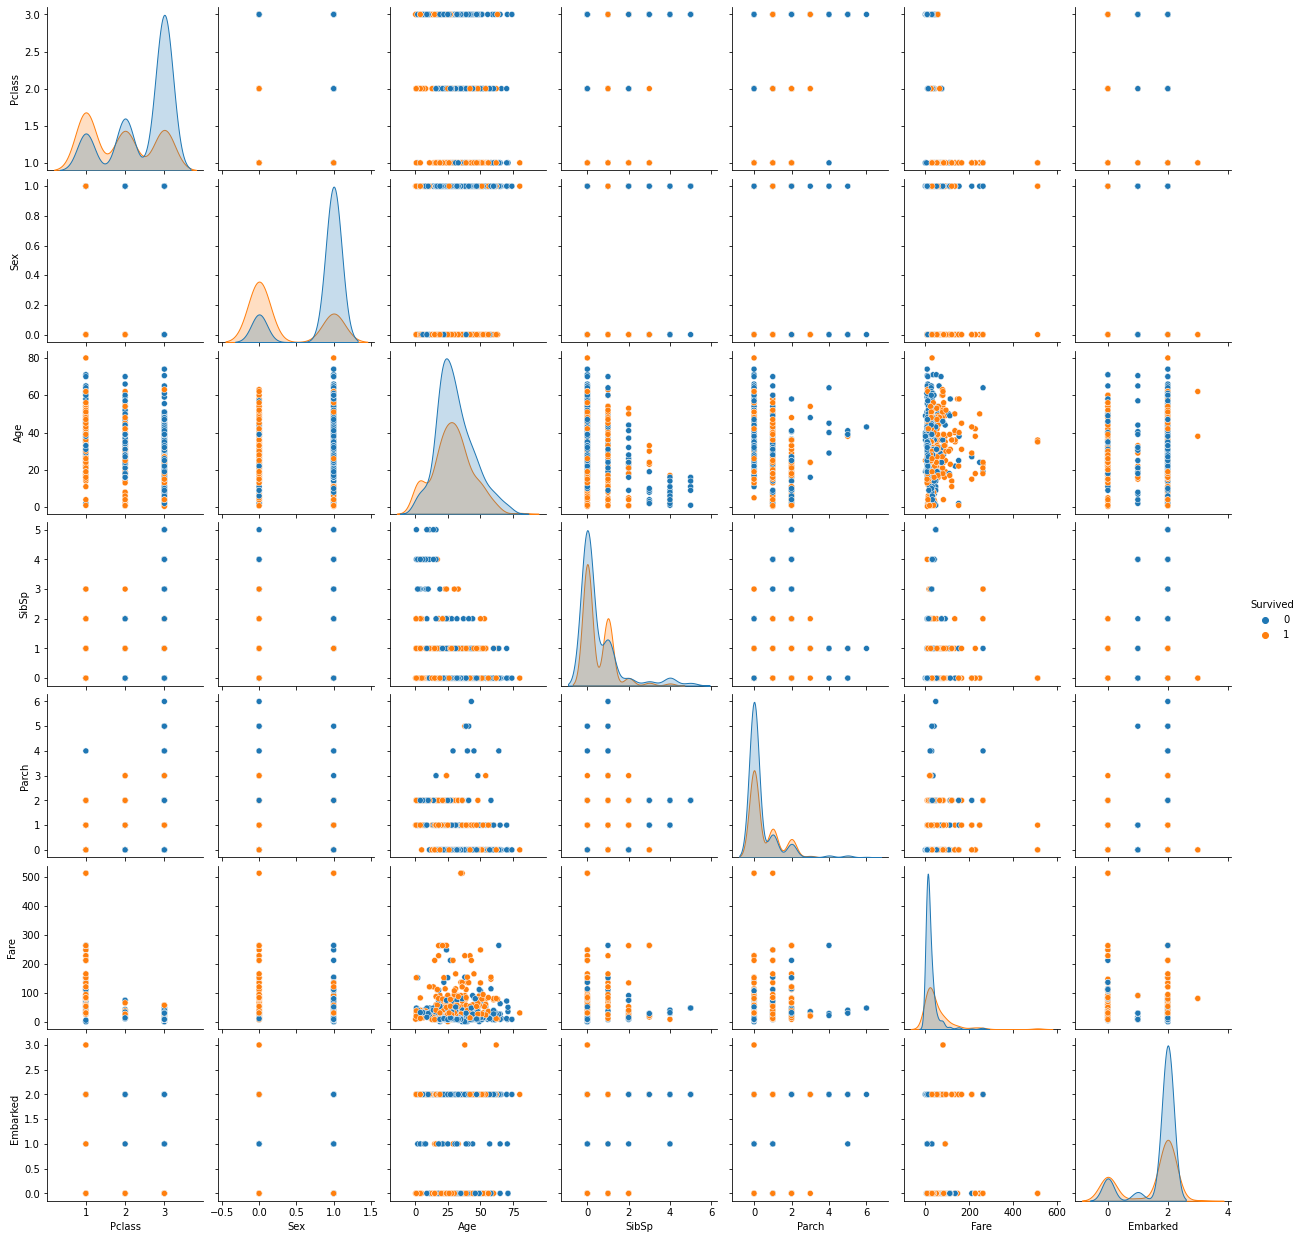

In [ ]:
# 기존 드롭 중 에이지만 살린다

# 1 데이터로드
import pandas as pd #판다스를 단축어pd 로 불러옴
from sklearn.preprocessing import LabelEncoder # 사이킷런.라벨인코더 불러옴
#사이킷런 :머신러닝라이브러리                       #트레인파일 불러오기
k = pd.read_csv('train.csv')   #서바 0은 죽음 서바 1은 생존이다
# 2 트레인파일 전처리  
    # 드롭으로 불필요한 시리즈 제거
k.drop(columns='Name', inplace=True)          #인플레이스트루로 바로 원본 수정
k.drop(columns='PassengerId', inplace=True)
k.drop(columns='Ticket', inplace=True)
k.drop(columns='Cabin', inplace=True)
# 인풋=쉐입이 총 7개다 (7,)

    # 라벨인코더 실행 # 컴퓨터가 인지하지 못하는 한글을 숫자로 바꾼다
LE1 = LabelEncoder().fit(k['Sex'])
LE2 = LabelEncoder().fit(k['Embarked'])
k['Sex'] = LabelEncoder().fit_transform(k['Sex'])  # 라벨생성규칙은 ksex시리즈를 핏하고 ksex데이터를 
k['Embarked'] = LabelEncoder().fit(k['Embarked']).transform(k['Embarked'])  #기준으로 라벨시리즈를 생성한 후
    # 결측지제거                                                      # 그 특정 [시리즈]를 지정한 시리즈에 넣는다
k.dropna(inplace=True)  # 디폴트 axis=0 결측지가 있는 행 전체를 삭제한다
    # 인덱스리셋 # 많은데이터를 다루면 인덱스가 바뀌기 쉽다 인덱스를 0부터 다시 지정할 수 있다
k.reset_index(inplace=True,drop=True)  # 드롭트루를 사용하여 기존 인덱스를 전부 지운다
                                       #드롭 트루가 없을 경우 기존 인덱스는 'index' 시리즈를 만들며 빠져나온다
# 3 그래프확인
import seaborn as sns #시본을 단축어 sns로 부른다
sns.pairplot(k, hue='Survived')  # 시본 페어플롯으로 k데이터의 survived값을 결과로 본다


# 4 정답 정리   머신러닝으로 줄 Y 값이다 
Y=k['Survived']
# 5 입력값 정리   머신러닝으로 줄 X 값이다  X와 Y를 주고 컴퓨터 스스로 학습하여  f(x)를 예측하게 한다
X=k.drop(columns='Survived')
# 6 둘의 행값 같은지 비교
X.shape, Y.shape
# 7 test파일 전처리: #트레인파일을 활용하여X,Y값을 줘서 딥러닝 모델을 만들고 이 딥러닝모델을 이용하여
                  # 테스트 파일의 생존인원을 예측한다
test=pd.read_csv('test.csv')                  #불러오기            
test.drop(columns='Name',inplace=True)         #불필요한 시리즈 제거
test.drop(columns='Ticket',inplace=True)
test.drop(columns='Cabin',inplace=True)  # 결측지제거, 인덱스리셋, 그래프확인 생략
test.drop(columns='PassengerId',inplace=True)



test['Sex']= LE1.transform(test['Sex'])           # k시리즈 핏으로 라벨인코딩
test['Embarked']= LE2.transform(test['Embarked'])

# test['Embarked'] = LabelEncoder().fit(k['Embarked']).transform(test['Embarked'])  에러????????
 
    # 딥러닝
# 8 딥러닝프레임워크인 텐서플로의 케라스 임폴       import 수입v  
from tensorflow import keras   
# 9 딥러닝 모델 생성    dense 밀집한,  layer  층, 쌓다, 막 ,    unit 단위
    #덴스값은 계속 추가 가능 , 덴스값: 모델의 각 Layer
    #덴스 구성 : keras.layers.Dense ( units, activation )  
    # 케라스.레이어스.덴스( ) 인자
    # units 첫번째 인자 = 출력 뉴런의 수. 레이어 안의 Node 수         node 접속점, 교점
    # input_dim = 입력 뉴런의 수. (입력의 차원)
    # activation = 활성화 함수. 적용할 액티베이션 함수
        #- linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력.
        #- relu : '은닉층'에 주로 사용되는 활성화 함수.
        #- sigmoid : 이진 분류 문제에서 '출력층'에 주로 사용되는 활성화 함수.
        #- softmax : '셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층'에 주로 사용되는 활성화 함수.
        
    # 모델 먼저 선언할 수도 있고 add로 덴스를 계속 추가할 수도 있다
    # model = Sequential()
    # model.add(Dense(1, input_dim=3, activation='relu'))    
  # 덴스는 모델의 각 레이어, 유닛은 래이어안의 노드 수 (출력뉴런의 수), 액티베이션-적용할 활성화 함수
dense1 = keras.layers.Dense(100,activation='relu',input_shape=(7,))  
    # 인풋 6   Pclass  Sex  SibSp  Parch     Fare  Embarked    6개 인풋
dense2 = keras.layers.Dense(1,activation='sigmoid')
# 덴스값: 모델의 각 Layer
# 덴스 구성 : keras.layers.Dense ( units, activation )  
# units 첫번째 인자 = 출력 뉴런의 수. 레이어 안의 Node 수         node 접속점, 교점
# 덴스는 모델의 각 레이어, 유닛은 래이어안의 노드 수 (출력뉴런의 수) ,액티베이션은 활성화함수

# 덴스값 두개로 모델을 선언하여 딥러닝 모델을 생성한다
#케라스 .시퀀셜로 모델을 생성한다   # 모델 클래스 객체를 생성한다
model=keras.Sequential([dense1,dense2])  #Sequential: 순차적인 , 시퀀스: 순서,차례로배열하다
# 10 학습방법 설정
model.compile(loss='binary_crossentropy',metrics='accuracy') 
    # 컴파일( ) 인자    #컴파일  모델학습방식을 설정하기 위한 함수
# ex) model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# optimizer = 훈련 과정을 설정하는 옵티마이저를 설정합니다. 
# loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
# metrics = 훈련을 모니터링하기 위한 지표를 선택합니다.
# 모델.compile ( optimizer, loss)    optimizer  모델 학습 최적화 방법                   loss : 손실 함수 설정
                                  # 옵티마이저 : 최대한활용하는사람 (최적화)           로스 : 손실
# 11 학습 실행    # 학습으로 컴퓨터 스스로 f(x)를  예측한다
model.fit(X,Y,epochs=50000)  # 에퍽 : (중요한사건이일어난)시대
    #모델네임.핏( ) 인자
# 핏(x,y)  x:학습데이터  y:(정답,도출하고자하는 결과 값이다)   x,y 값을 주고 f(x) 를 딥러닝으로 알아내려고 한다
# epochs=500 : 전체 데이터셋에 대하여 500번 학습을 하겠다는 뜻


# 실제 답안이 없으니 의미 없다
# 12 답안파일경로설정, 테스트 정답 정리 , 답안지의 생존 시리즈의 경로를 설정했다
                       # 트레인파일로 딥러닝 모델을 만들고 그 모델을 이용하여
                       # 테스트파일에서 생존값을 예측했다 그 생존값을
                       # gender_submission 파일(답안제출파일)의 'Survived' 시리즈에 넣기위해 
                       # end 로 불러오고 end_y 로 생존시리즈의 경로를 설정한다
end=pd.read_csv('gender_submission.csv')                     
end_y=end['Survived']

# 실제 답안이 없으니 의미 없다
# 13.# 학습된 모델의 정확성을 알아본다 ,  모델검증, 모델을 평가하기 위한 메소드
model.evaluate(test, end_y)                   
    # evaluate (x,y)  x: X입력값,  y: 정답(모델검증으로쓸값)
 # loss 손실과, 아큐러시 정확도 0,xx   xx퍼센트 정확도를 알려준다


 # 14 학습된 모델 이용 결과 만들기: 0과1이 아닌   
    # 각 데이터의 죽음0과~생존1 사이로 예측된 실수값이 어레이로 뽑힌다
end_data=model.predict(test)      
    # model.predict (x)  
    # ( ) X 값에 대하여 학습된 모델이 예측한 Y 값을 실수로 알려준다
    # 서바 0은 죽음 서바 1은 생존 >  0~1 사이의 값이다
    # 그 값에 대한 일정 기준을 세워서 정답을 가늠해야 할 것이다.
    # ex) 0.5 이상이면 생존
# end_data.shape    =   (418,1)
# len(end_data)    =   418
# type(end_data)  =  numpy.ndarray
# end_data 는 418*1 의 2차원 행렬이다  어레이 타입
# end_data






In [ ]:

# 15 결과 비율 결정
ck1=end_data>0.6
    # ck1 :   0.5 다 크면 True 아니면 False 값이 반환된 어레이다
    #  418*1의 2차원 행렬이다
    #  type(ck1)  =  numpy.ndarray
ck1

# 이 값을 제출


In [ ]:
# age를 10 간격으로 전처리를 해야한다
# 데이터는 k
k['Age'] 에서
0~10
10~20
20~30
30~40
,,
90~100

for i in test['Age'] :
    if 0<= i <10 :
        return 10
    elif 10<= i <20 :
        return 20
    elif 20<= i <30 :
        return 30
    elif 30<= i <40 :
        return 40
    elif 40<= i <50 :
        return 50
    elif 50<= i <60 :
        return 60
    elif 60<= i <70 :
        return 70
    elif 70<= i <80 :
        return 80
    elif 80<= i <90 :
        return 90
    elif 90<= i <100 :
        return 100
    else:
        return 50

In [ ]:
print(test)

test2=list(test['Age'])
print(test2)
for i in test2 :
    if 0<= i <10 :
        return 10
    elif 10<= i <20 :
        return 20
    elif 20<= i <30 :
        return 30
    elif 30<= i <40 :
        return 40
    elif 40<= i <50 :
        return 50
    elif 50<= i <60 :
        return 60
    elif 60<= i <70 :
        return 70
    elif 70<= i <80 :
        return 80
    elif 80<= i <90 :
        return 90
    elif 90<= i <100 :
        return 100
    else:
        return 50

print(test2)

In [ ]:



k2 = list(k['Age'])
k3=[]
for i in k2 :
    if 0<= i <10 :
        k3.append(10)
    elif 10<= i <20 :
        k3.append(20)
    elif 20<= i <30 :
        k3.append(30)
    elif 30<= i <40 :
        k3.append(40)
    elif 40<= i <50 :
        k3.append(50)
    elif 50<= i <60 :
        k3.append(60)
    elif 60<= i <70 :
        k3.append(70)
    elif 70<= i <80 :
        k3.append(80)
    elif 80<= i <90 :
        k3.append(90)
    elif 90<= i <100 :
        k3.append(100)
    else:
        k3.append(50)

print(k3)
print(len(k3))

#k3는 10간격으로 준 리스트
# 시리즈로 변환
k['Age'] = pd.Series(k3)



test2 = list(test['Age'])
test3=[]


for i in test2 :
    if 0<= i <10 :
        test3.append(10)
    elif 10<= i <20 :
        test3.append(20)
    elif 20<= i <30 :
        test3.append(30)
    elif 30<= i <40 :
        test3.append(40)
    elif 40<= i <50 :
        test3.append(50)
    elif 50<= i <60 :
        test3.append(60)
    elif 60<= i <70 :
        test3.append(70)
    elif 70<= i <80 :
        test3.append(80)
    elif 80<= i <90 :
        test3.append(90)
    elif 90<= i <100 :
        test3.append(100)
    else:
        test3.append(50)

print(test3)
print(len(test3))

#는 10간격으로 준 리스트
# 시리즈로 변환
test['Age'] = pd.Series(test3)